In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(415)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Example to understand the working

In [10]:
s = "Power BI sessions are suspended until further notice due to the trainer’s health issues. We regret any inconvenience caused. Thank you for your understanding."
data = s.lower()
punct = string.punctuation + "’"
data = "".join([i for i in data if i not in punct])
stop = stopwords.words('english')
tokens = data.split()
tokens_without_stop = [i for i in tokens if i not in stop]
print(tokens_without_stop)
print(tokens)

['power', 'bi', 'sessions', 'suspended', 'notice', 'due', 'trainers', 'health', 'issues', 'regret', 'inconvenience', 'caused', 'thank', 'understanding']
['power', 'bi', 'sessions', 'are', 'suspended', 'until', 'further', 'notice', 'due', 'to', 'the', 'trainers', 'health', 'issues', 'we', 'regret', 'any', 'inconvenience', 'caused', 'thank', 'you', 'for', 'your', 'understanding']


In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajayk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
root_form_stem = [stemmer.stem(i) for i in tokens_without_stop]
root_form_lem = [lemmatizer.lemmatize(i, pos='n') for i in tokens_without_stop]
print(root_form_stem)
print(root_form_lem)

['power', 'bi', 'session', 'suspend', 'notic', 'due', 'trainer', 'health', 'issu', 'regret', 'inconveni', 'caus', 'thank', 'understand']
['power', 'bi', 'session', 'suspended', 'notice', 'due', 'trainer', 'health', 'issue', 'regret', 'inconvenience', 'caused', 'thank', 'understanding']


Defining a function for text preprocessing

In [13]:
def preprocess(text):
    tokens=''.join([i for i in text.lower() if i not in punct])
    tokens_without_stop=[lemmatizer.lemmatize(i,pos='v') for i in tokens.split() if i not in stop] 
    return " ".join(tokens_without_stop)


In [14]:
df['Message'] = df['Message'].apply(preprocess)

Encoding

In [15]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [16]:
X = df['Message']
y = df['Category']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vector = vectorizer.fit_transform(X)

Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3)

Model Selection/ Training/ Evaluation

KNeighborsClassifier()
89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1328
           1       1.00      0.24      0.38       220

    accuracy                           0.89      1548
   macro avg       0.94      0.62      0.66      1548
weighted avg       0.90      0.89      0.86      1548



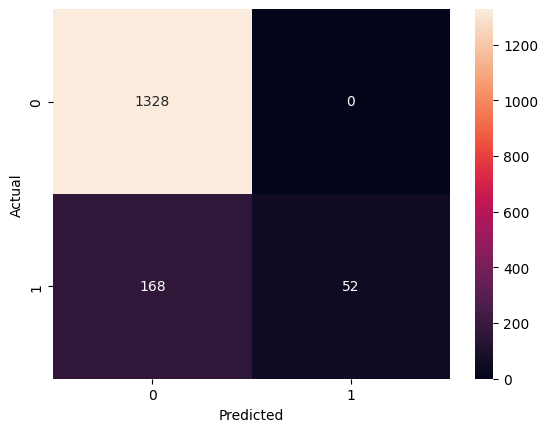

DecisionTreeClassifier()
95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1328
           1       0.87      0.77      0.82       220

    accuracy                           0.95      1548
   macro avg       0.92      0.88      0.89      1548
weighted avg       0.95      0.95      0.95      1548



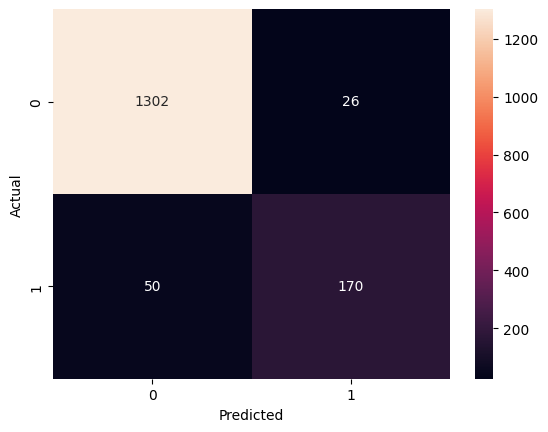

MultinomialNB()
97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1328
           1       0.90      0.90      0.90       220

    accuracy                           0.97      1548
   macro avg       0.94      0.94      0.94      1548
weighted avg       0.97      0.97      0.97      1548



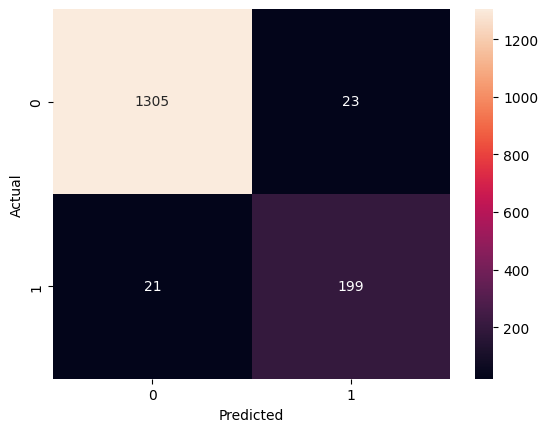

GradientBoostingClassifier()
96
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1328
           1       0.97      0.70      0.82       220

    accuracy                           0.96      1548
   macro avg       0.96      0.85      0.90      1548
weighted avg       0.96      0.96      0.95      1548



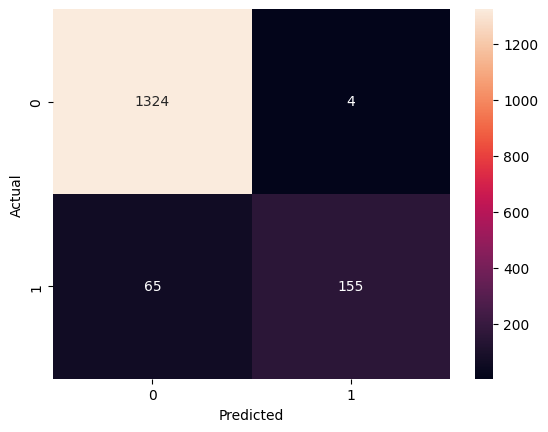

SVC()
96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1328
           1       1.00      0.73      0.84       220

    accuracy                           0.96      1548
   macro avg       0.98      0.86      0.91      1548
weighted avg       0.96      0.96      0.96      1548



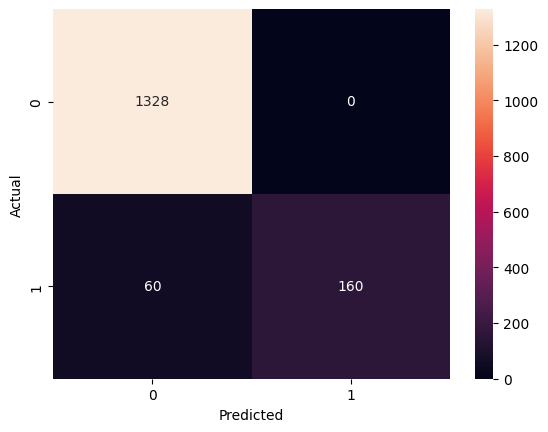

RandomForestClassifier()
96
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1328
           1       1.00      0.71      0.83       220

    accuracy                           0.96      1548
   macro avg       0.98      0.85      0.90      1548
weighted avg       0.96      0.96      0.96      1548



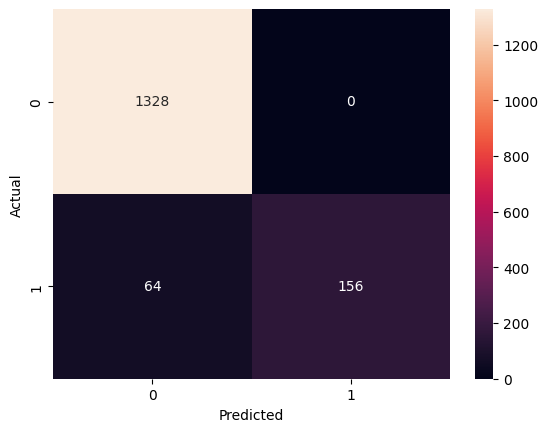

In [19]:
models={KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), MultinomialNB(), RandomForestClassifier(), GradientBoostingClassifier()}
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print(round(accuracy_score(y_test, y_pred)*100))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

In [20]:
print((cross_val_score(MultinomialNB(), X_train, y_train,cv=5).mean())*100)

97.03543478010303
